In [1]:
# MY SIMULATION 
import itertools
%matplotlib inline
import os
import random 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML
import vertex_model as model
# from vertex_model.run_select_nosaveinfo import run_simulation_INM, definecolors, run_simulation_no_INM
import itertools
import numpy as np
import matplotlib.pyplot as plt
import vertex_model as model
import vertex_model.initialisation as init
import vertex_model.characterization as crt
from vertex_model.forces import TargetArea, Tension, Perimeter, Pressure
import os
import seaborn as sns
import warnings
import matplotlib.colors as colors
warnings.filterwarnings('ignore') #Don't show warnings
#from Gobal_Constant import dt, viscosity, t_G1, t_G2, t_S, A_c, J, pos_d, T1_eps, P, microns, time_hours, expansion_constant #file with necessary constants
from vertex_model.run_select import save_data
sns.set_style("whitegrid")
from scipy.spatial import Delaunay
from scipy.stats import sem

INPUT CENTRES TO BUILD A PLANAR VORONOI MESH: 
los centros son los nodos de una malla cuadriculada de 2x2


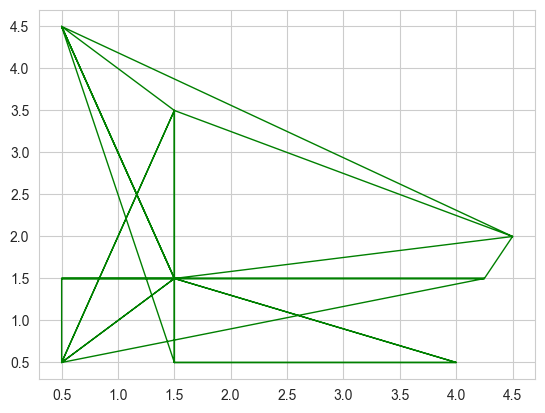

In [3]:
# input the coordinates of the centers of the mesh. It has to be a matrix (array of 2 dim arrays)
centers = np.array([ [0,0], [1,0], [2, 0], [0,1], [1,1], [1,2], [0,2], [2, 1], [2,2], [0,0]])
# use voronoi diagram to obtain the mesh 
reflected_centers= np.array([ [3,4], [1,0], [6, 0], [0,1], [1,1], [1,2], [0,2], [2, 1], [2,2], [0,0]]) # dont know what is this for 
mesh = init.planar_voronoi_mesh(centers, reflected_centers)
cells = model.Cells(mesh)
v = mesh.vertices
model.plotting._draw_edges(mesh, plt)

RANDOM CENTRES FOR PLANAR VORONOI MESH 

In [4]:
N_cell_across = 7
N_cell_up = 8
rand =  np.random.RandomState()
c = init.random_centres(N_cell_across, N_cell_up, rand)
mesh = init.planar_voronoi_mesh(c[0], c[0])
model.plotting._draw_edges(mesh, plt) 
# NO SALE UN MESH REGULAR OBVVVV


IndexError: index 262 is out of bounds for axis 1 with size 262

HEXAGONAL CENTRES FOR A PLANAR VORONOI MESH: i can't achieve a regular mesh. Idk what to write as an input in the parameter "reflected_centres"

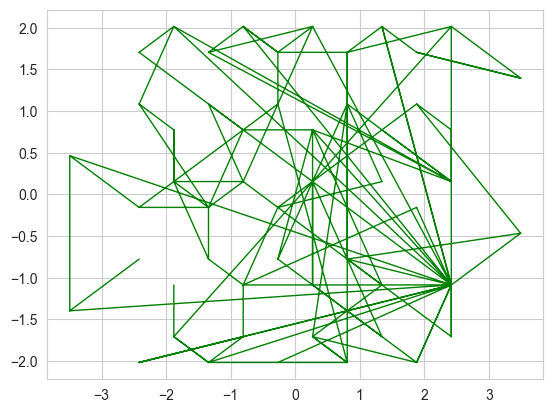

In [ ]:
N_cell_across = 6
N_cell_up = 6
rand = 1
rand =  np.random.RandomState()
c = init.hexagonal_centres(N_cell_across, N_cell_up, 0, rand)
mesh = init.planar_voronoi_mesh(c[0], c[0])
model.plotting._draw_edges(mesh, plt) 


 **TOROIDAL HEXAGONAL MESH**:   
hexagonal mesh that can be deformed by chaging the noise parameter (third parameter of the toroidal_hex_mesh function).   
Plot de los mesh ok!   


- Cero noise

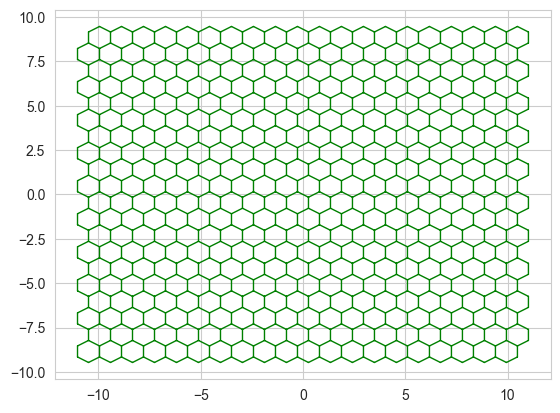

In [ ]:
# como no me sale con planar lo hago con toroidal 
rand =  np.random.RandomState() #random number to choose Lambda
mesh = init.toroidal_hex_mesh(20,20,noise=0,rand=rand)
mesh.vertices = mesh.vertices
model.plotting._draw_edges(mesh, plt) 


- Noise = 0.4

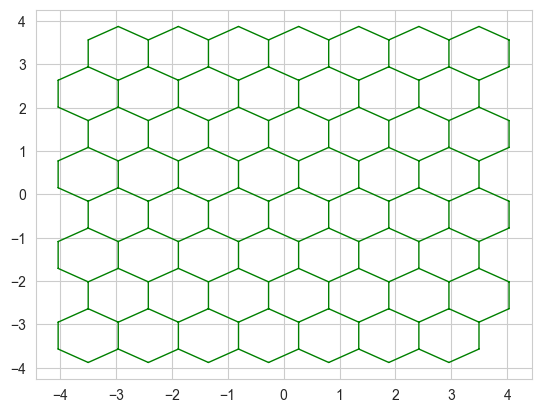

In [ ]:
# como no me sale con planar lo hago con toroidal 
rand =  np.random.RandomState() #random number to choose Lambda
mesh_deformado = init.toroidal_hex_mesh(7,8,noise=0,rand=rand)
#mesh_deformado.vertices = mesh_deformado.vertices +  10* np.random.normal(0,1)
model.plotting._draw_edges(mesh_deformado, plt) 


- Noise = 1

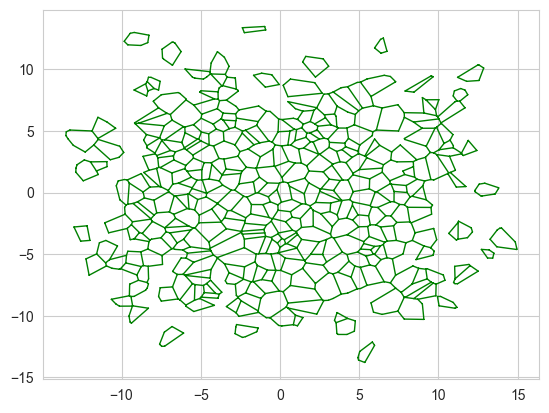

In [ ]:
rand =  np.random.RandomState() #random number to choose Lambda
mesh_deformado = init.toroidal_hex_mesh(18,18,noise=2.5,rand=rand)
model.plotting._draw_edges(mesh_deformado, plt) 

In [ ]:
def angle_distortion(points): 
    angles = angles_t(points)
    angle_distortion = []
    r = np.pi / 3
    for  i in np.arange(len(angles)): 
        n = 3* (((angles
                  [i][0]-r)**2) +((angles[i][1]-r)**2 )+((angles[i][2]-r)**2))
        d = np.pi ** 2
        phi_k = n/d
        #dif = (t[0]-r)**2 +(t[1]-r)**2 +(t[2]-r)**2 
        angle_distortion.append(phi_k)
    return angle_distortion

**HEXAGONAL CENTRES FOR DELAUNAY TRIANGULATION** 
  
  Plotting Delaunay triangulations 

In [ ]:
def indices_interior_triangles(triangulation):
    neighbors = triangulation.neighbors
    frontier =[]
    interior = []
    for i in np.arange(len(neighbors)):
        t = neighbors[i]
        if t[0] | t[1] | t[2] == -1:
            frontier.append(i)
        else: 
            interior.append(i) 
    return interior

In [ ]:
# Mesh dimension parameters 
N_cell_across = 7
N_cell_up = 8

- Hexagonal centres with no noise

12172.315789047654
The number of triangles is 98
56895.213899432034
[[294.0983270876168, 978.3218299148103, 684.2746795892248], [347.1989811936985, 684.2746795892248, 337.32079842713483], [166.32330470823987, 73.88468272665246, 170.63412679546545], [166.32330470823987, 177.05235041864069, 236.62048690426892], [252.70710982715485, 138.28611263731867, 222.87850558970436], [252.70710982715485, 185.55003419753837, 226.83771947157476], [240.24723099441434, 347.1989811936985, 156.88535352581246], [216.20132272854158, 166.69897506750303, 178.32615889504402], [304.2940339022015, 202.8656727851812, 505.7395213272394], [156.56026481075753, 178.32615889504402, 159.58091844631372], [140.5809951667034, 159.58091844631372, 185.55003419753837], [151.54171672392133, 304.2940339022015, 156.56026481075753], [151.54171672392133, 140.5809951667034, 131.3893951599435], [130.0607818901062, 125.76006379679181, 138.28611263731867], [241.30252134185113, 218.2917793255028, 238.43720056460575], [130.060781890106

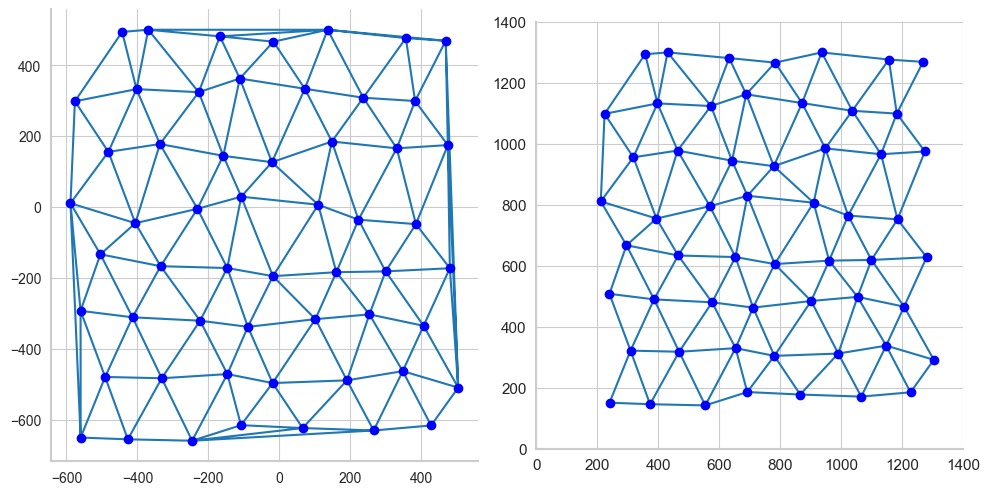

In [ ]:
# create hexagonal centres given length and height 
noise =20
hex_centres = init.hexagonal_centres_nbp(7,8, noise, rand= np.random.RandomState())
# create a voronoi mesh with those centres 
mesh = init.toroidal_ic_mesh(hex_centres)
hex_centres = hex_centres[0]
# Ploting voronoi cell mesh
# Computing Delaunay triangulation
tri = Delaunay(hex_centres)
triangles = hex_centres[tri.simplices]
### calculate threshold using mean and std of angles 
###Z SCORE
angles_t = crt.angles_t(triangles)
angles = []
for elem in angles_t: 
    angles.append(elem[0]) ;   angles.append(elem[1]);    angles.append(elem[2])

angles_mean = np.mean(angles); angles_std = np.std(angles)
threshold = angles_mean+2*angles_std

non_obtuse, non_obtuse_indices, obtuse, obtuse_indices = crt.triangle_sieve_zscore(triangles, threshold)
### REMOVE FRONTIER EDGES 
## identify frontier triangles
# neighbors = tri.neighbors
# frontier =[]
# interior = []
# for i in np.arange(len(neighbors)):
#     t = neighbors[i]
#     if t[0] | t[1] | t[2] == -1:
#         frontier.append(i)
#     else: 
#         interior.append(i) 
trisieve = tri.simplices[non_obtuse_indices]



fig, axs = plt.subplots(1, 2, figsize=(10, 5))
plt.xticks([-800, -600, -400, -200, 0, 200, 400, 600], [0,200, 400, 600, 800, 1000, 1200, 1400])
plt.yticks([-800, -600, -400, -200, 0, 200, 400, 600], [0, 200, 400, 600, 800, 1000, 1200, 1400])
plt.xlim(-800, 600)
plt.ylim(-800, 600)
# Configurar el tamaño de los subplots para que sean cuadrados
for ax in axs:
    ax.set_aspect('equal')
# Plot Del tri
axs[0].triplot(hex_centres[:,0], hex_centres[:,1], tri.simplices, color='tab:blue')

axs[0].plot(hex_centres[:,0], hex_centres[:,1], 'o', color='blue')

#model.plotting._draw_edges(mesh, axs[0]) 

axs[1].triplot(hex_centres[:,0], hex_centres[:,1], trisieve, color='tab:blue')
axs[1].plot(hex_centres[:,0], hex_centres[:,1], 'o', color='blue')

#model.plotting._draw_edges(mesh, axs[1]) 
ax = plt.gca()

axs[0].spines['left'].set_linewidth(1.5)   # Left Y-axis
axs[0].spines['bottom'].set_linewidth(1.5) # Bottom X-axis
axs[0].spines['top'].set_linewidth(0) # Bottom X-axis
axs[0].spines['right'].set_linewidth(0) # Bottom X-axis

axs[1].spines['left'].set_linewidth(1.5)   # Left Y-axis
axs[1].spines['bottom'].set_linewidth(1.5) # Bottom X-axis
axs[1].spines['top'].set_linewidth(0) # Bottom X-axis
axs[1].spines['right'].set_linewidth(0) # Bottom X-axis



plt.rcParams['xtick.major.size'] = 6
plt.rcParams['xtick.major.width'] = 1.5
plt.rcParams['ytick.major.size'] = 6
plt.rcParams['ytick.major.width'] = 1.5
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True
plt.tick_params(axis='both', which='major', labelsize=11)
plt.rcParams['ytick.labelsize']= 10
plt.rcParams['xtick.labelsize']= 10
plt.rcParams['legend.fontsize'] = 15
plt.tight_layout()
plt.xticks([-800, -600, -400, -200, 0, 200, 400, 600], [0,200, 400, 600, 800, 1000, 1200, 1400])
plt.yticks([-800, -600, -400, -200, 0, 200, 400, 600], [0, 200, 400, 600, 800, 1000, 1200, 1400])
plt.xlim(-800, 600)
plt.ylim(-800, 600)
plt.show
 #### Area calculation 
ad = crt.length_distortion(triangles)
area, std = crt.mean_area_triangles(triangles)
print(area)
print('The number of triangles is %i' %len(tri.simplices))
total_length = crt.total_length(triangles)
print(total_length)
edges, e = crt.edges_length_triangles(triangles)
print(edges)




- Delaunay triangulation of hexagonal centres with noise = 1

(-5.0, 5.0)

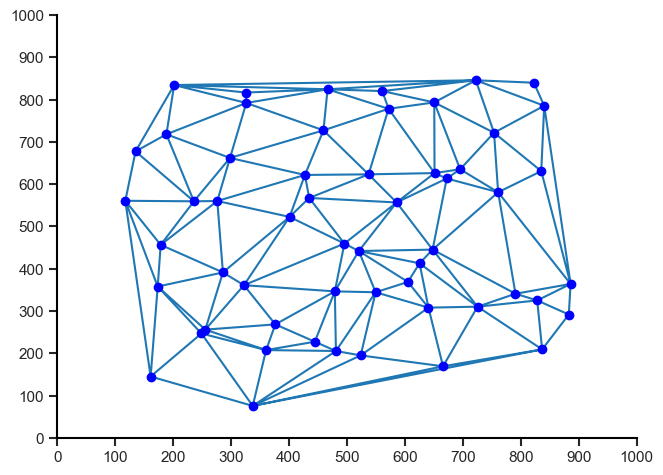

In [32]:
# create hexagonal centres gi18ven length and height 
noise = 0.38
hex_centres_def = init.hexagonal_centres(7, 8, noise, rand= np.random.RandomState())
# create a voronoi mesh with those centres 
mesh_def = init.toroidal_ic_mesh(hex_centres_def)
hex_centres_def = hex_centres_def[0]
# Ploting voronoi cell mesh
#plt.title('Voronoi diagram and Delaunay triangulation for noise = %i'%noise)
# model.plotting._draw_edges(mesh_def, plt) 
# Computing Delaunay triangulation
tri_def = Delaunay(hex_centres_def)
triangles = hex_centres_def[tri_def.simplices]
angles_t = crt.angles_t(triangles)
angles = []
for elem in angles_t: 
    angles.append(elem[0]) ;   angles.append(elem[1]);    angles.append(elem[2])

angles_mean = np.mean(angles); angles_std = np.std(angles)
threshold = angles_mean+2*angles_std

non_obtuse, non_obtuse_indices, obtuse, obtuse_indices = crt.triangle_sieve_zscore(triangles, threshold)
# non_obtuse, non_obtuse_indices, obtuse, obtuse_indices = crt.triangle_sieve(triangles, np.pi / 6, np.pi - (np.pi / 6))
trisieve = tri_def.simplices[non_obtuse_indices]

# Plot Del tri
plt.plot
ax = plt.gca()
plt.grid(False)
ax.spines['left'].set_linewidth(1.5)   # Left Y-axis
ax.spines['bottom'].set_linewidth(1.5) # Bottom X-axis
ax.spines['top'].set_linewidth(0) # Bottom X-axis
ax.spines['right'].set_linewidth(0) # Bottom X-axis
ax.spines['left'].set_color('black')   # Left Y-axis
ax.spines['bottom'].set_color('black') # Bottom X-axis

plt.triplot(hex_centres_def[:,0], hex_centres_def[:,1], tri_def.simplices, color='tab:blue')
plt.plot(hex_centres_def[:,0], hex_centres_def[:,1], 'o', color='blue')
# model.plotting._draw_edges(mesh_def, plt) 

plt.rcParams['xtick.major.size'] = 6
plt.rcParams['xtick.major.width'] = 1.5
plt.rcParams['ytick.major.size'] = 6
plt.rcParams['ytick.major.width'] = 1.5
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True
plt.tick_params(axis='both', which='major', labelsize=11)
plt.rcParams['ytick.labelsize']= 10
plt.rcParams['xtick.labelsize']= 10
plt.rcParams['legend.fontsize'] = 15
plt.tight_layout()
# plt.xlim(-600,600); plt.ylim(-600, 600)

# plt.xticks([-800, -600, -400, -200, 0, 200, 400, 600], [0,200, 400, 600, 800, 1000, 1200, 1400])
# plt.yticks([-800, -600, -400, -200, 0, 200, 400, 600], [0, 200, 400, 600, 800, 1000, 1200, 1400])
plt.xticks([-5,  -4, -3, -2, -1,0, 1,2,3, 4,5], [0,100, 200, 300, 400, 500, 600,700,800,900, 1000])
plt.yticks([-5,  -4, -3, -2, -1,0, 1,2,3, 4,5], [0,100, 200, 300, 400, 500, 600,700,800,900, 1000])
# plt.xticks([ -4, -2, 0, 2, 4, 6], [0,200, 400, 600, 800, 1000])
# plt.yticks([ -4,  -2, 0, 2, 4, 6], [0, 200, 400, 600, 800, 1000])
plt.xlim(-5, 5)
plt.ylim(-5, 5)

(-5.0, 5.0)

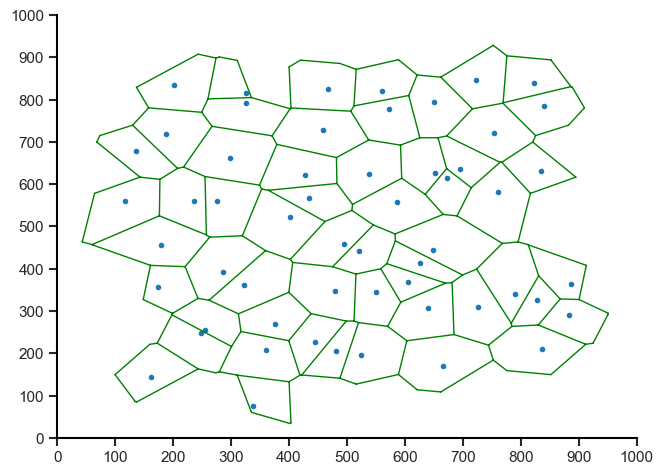

In [36]:
plt.plot
ax = plt.gca()
plt.grid(False)
ax.spines['left'].set_linewidth(1.5)   # Left Y-axis
ax.spines['bottom'].set_linewidth(1.5) # Bottom X-axis
ax.spines['top'].set_linewidth(0) # Bottom X-axis
ax.spines['right'].set_linewidth(0) # Bottom X-axis
ax.spines['left'].set_color('black')   # Left Y-axis
ax.spines['bottom'].set_color('black') # Bottom X-axis
plt.plot(hex_centres_def[:,0], hex_centres_def[:,1], 'o', color='tab:blue',markersize=3 )

model.plotting._draw_edges(mesh_def, plt) 
plt.rcParams['xtick.major.size'] = 6
plt.rcParams['xtick.major.width'] = 1.5
plt.rcParams['ytick.major.size'] = 6
plt.rcParams['ytick.major.width'] = 1.5
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True
plt.tick_params(axis='both', which='major', labelsize=11)
plt.rcParams['ytick.labelsize']= 10
plt.rcParams['xtick.labelsize']= 10
plt.rcParams['legend.fontsize'] = 15
plt.tight_layout()
# plt.xlim(-600,600); plt.ylim(-600, 600)

# plt.xticks([-800, -600, -400, -200, 0, 200, 400, 600], [0,200, 400, 600, 800, 1000, 1200, 1400])
# plt.yticks([-800, -600, -400, -200, 0, 200, 400, 600], [0, 200, 400, 600, 800, 1000, 1200, 1400])

# plt.xticks([-6,  -4, -2, 0, 2, 4, 6], [0,200, 400, 600, 800, 1000, 1200])
# plt.yticks([ -6, -4,  -2, 0, 2, 4, 6], [0, 200, 400, 600, 800, 1000,1200])
# plt.xlim(-6, 5)
# plt.ylim(-6, 5)
plt.xticks([-5,  -4, -3, -2, -1,0, 1,2,3, 4,5], [0,100, 200, 300, 400, 500, 600,700,800,900, 1000])
plt.yticks([-5,  -4, -3, -2, -1,0, 1,2,3, 4,5], [0,100, 200, 300, 400, 500, 600,700,800,900, 1000])
plt.xlim(-5, 5)
plt.ylim(-5, 5)



(-5.0, 5.0)

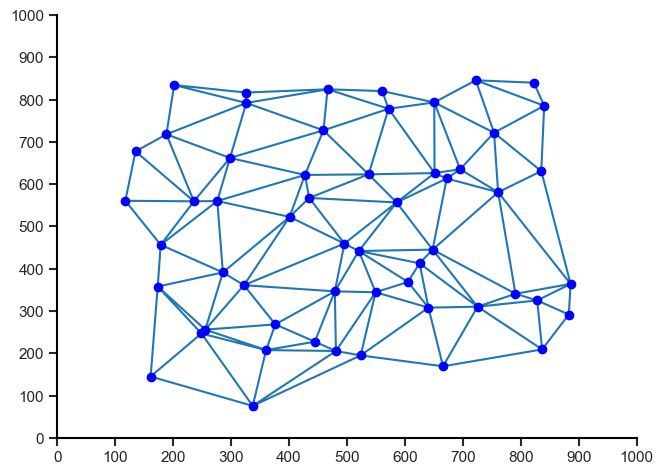

In [34]:
plt.plot
ax = plt.gca()
plt.grid(False)
ax.spines['left'].set_linewidth(1.5)   # Left Y-axis
ax.spines['bottom'].set_linewidth(1.5) # Bottom X-axis
ax.spines['top'].set_linewidth(0) # Bottom X-axis
ax.spines['right'].set_linewidth(0) # Bottom X-axis
ax.spines['left'].set_color('black')   # Left Y-axis
ax.spines['bottom'].set_color('black') # Bottom X-axis

plt.triplot(hex_centres_def[:,0], hex_centres_def[:,1], trisieve, color='tab:blue')
plt.plot(hex_centres_def[:,0], hex_centres_def[:,1], 'o', color='blue')
# model.plotting._draw_edges(mesh_def, plt) 

plt.rcParams['xtick.major.size'] = 6
plt.rcParams['xtick.major.width'] = 1.5
plt.rcParams['ytick.major.size'] = 6
plt.rcParams['ytick.major.width'] = 1.5
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True
plt.tick_params(axis='both', which='major', labelsize=11)
plt.rcParams['ytick.labelsize']= 10
plt.rcParams['xtick.labelsize']= 10
plt.rcParams['legend.fontsize'] = 15
plt.tight_layout()
# plt.xlim(-600,600); plt.ylim(-600, 600)

plt.xticks([-5,  -4, -3, -2, -1,0, 1,2,3, 4,5], [0,100, 200, 300, 400, 500, 600,700,800,900, 1000])
plt.yticks([-5,  -4, -3, -2, -1,0, 1,2,3, 4,5], [0,100, 200, 300, 400, 500, 600,700,800,900, 1000])
# plt.xticks([ -4, -2, 0, 2, 4, 6], [0,200, 400, 600, 800, 1000])
# plt.yticks([ -4,  -2, 0, 2, 4, 6], [0, 200, 400, 600, 800, 1000])
plt.xlim(-5, 5)
plt.ylim(-5, 5)

- Delaunay triangulation of hexagonal centres with noise = 5

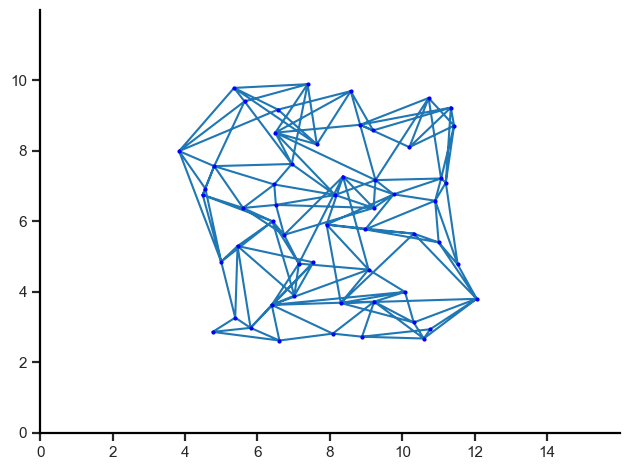

In [44]:
# create hexagonal centres given length and height 
noise = 0.35
hex_centres_def2 = init.hexagonal_centres(7, 8, noise, rand= np.random.RandomState())
# create a voronoi mesh with those centres 
mesh_def2 = init.toroidal_ic_mesh(hex_centres_def2)
hex_centres_def2 = hex_centres_def2[0]
# Ploting voronoi cell mesh
#model.plotting._draw_edges(mesh_def2, plt) 
# Computing Delaunay triangulation
tri_def2 = Delaunay(hex_centres_def2)

# Plot Del tri
plt.triplot(hex_centres_def2[:,0], hex_centres_def2[:,1], trisieve, color='tab:blue', label = 'Delaunay triangulation')
plt.plot(hex_centres_def2[:,0], hex_centres_def2[:,1], 'o', color='blue', markersize=2)
ax = plt.gca()

ax.spines['left'].set_linewidth(1.6)   # Left Y-axis
ax.spines['bottom'].set_linewidth(1.6) # Bottom X-axis
ax.spines['top'].set_linewidth(0) # Bottom X-axis
ax.spines['right'].set_linewidth(0) # Bottom X-axis

ax.spines['left'].set_color('black')   # Left Y-axis
ax.spines['bottom'].set_color('black') # Bottom X-axis

plt.rcParams['xtick.major.size'] = 6
plt.rcParams['xtick.major.width'] = 1.6
plt.rcParams['ytick.major.size'] = 6
plt.rcParams['ytick.major.width'] = 1.6
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True
plt.tick_params(axis='both', which='major', labelsize=11)
plt.rcParams['ytick.labelsize']= 10
plt.rcParams['xtick.labelsize']= 10
plt.rcParams['legend.fontsize'] = 10
plt.tight_layout()
# plt.xlim(-600,600); plt.ylim(-600, 600)
plt.grid(False)

plt.xticks([-8, -6, -4, -2, 0, 2, 4, 6], [0, 2,  4,  6,  8, 10, 12, 14])
plt.yticks([-6, -4, -2, 0, 2, 4], [0, 2,  4,  6,  8, 10])
plt.xlim(-8, 8)
plt.ylim(-6, 6)
plt.show()


2.4628987059067455


(array([0.17652229, 0.        , 1.78728817, 3.57457633, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.08826114]),
 array([0.45269121, 0.63041692, 0.80814263, 0.98586834, 1.16359405,
        1.34131976, 1.51904547, 1.69677118, 1.87449689, 2.0522226 ,
        2.22994832]),
 <BarContainer object of 10 artists>)

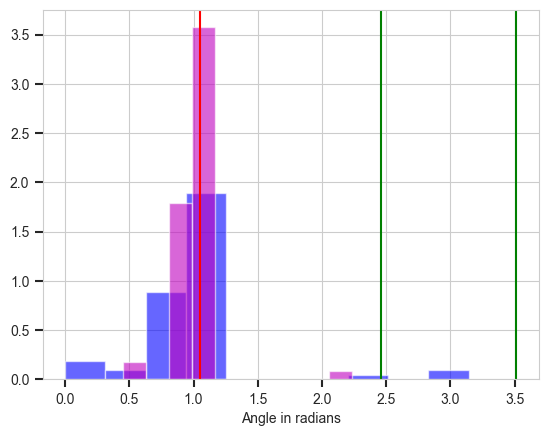

In [7]:
## z score to detect outliers
noise =1
hex_centres = init.hexagonal_centres_nbp(10,10, noise, rand= np.random.RandomState())
# create a voronoi mesh with those centres 
mesh = init.toroidal_ic_mesh(hex_centres)
hex_centres = hex_centres[0]
# Ploting voronoi cell mesh
# Computing Delaunay triangulation
tri = Delaunay(hex_centres)
triangles = hex_centres[tri.simplices]

angles_t = crt.angles_t(triangles)
angles = []
for elem in angles_t: 
    angles.append(elem[0]) ;   angles.append(elem[1]);    angles.append(elem[2])

plt.hist(angles, bins=10, density=True, alpha=0.6, color='b', label='Histogram')
plt.xlabel('Angle in radians')
angles_mean = np.mean(angles); angles_std = np.std(angles)
plt.axvline(x = angles_mean, color='red')
plt.axvline(x = angles_mean+3*angles_std, color='green')
plt.axvline(x = np.pi-(angles_mean-3*angles_std), color='green')
threshold = angles_mean+3*angles_std
print(threshold)
non_obtuse, non_obtuse_indices, obtuse, obtuse_indices = crt.triangle_sieve_zscore(triangles,angles_mean+3*angles_std)

angles_nonobt_t= crt.angles_t(non_obtuse)
anonob = []
for elem in angles_nonobt_t:
    anonob.append(elem[0]) ;   anonob.append(elem[1]);    anonob.append(elem[2])
plt.hist(anonob, bins=10, density=True, alpha=0.6, color='m', label='Histogram')

**Characterization of the meshes depending on the level of noise**

AREA


In [ ]:
N_cell_across= 7
N_cell_up= 8
noise_vec = np.arange(0, 0.7, 0.01) #different values of noise 
n = noise_vec.size
area_cell1 = []
area_cell_half = []
area_vec = []

for noise in noise_vec: 
    hex_centres = init.hexagonal_centres(N_cell_across, N_cell_up, noise, rand= np.random.RandomState())
    tri = Delaunay(hex_centres[0])
    mesh = init.toroidal_ic_mesh(hex_centres)
    a = mesh.area
    area_vec.append(np.mean(mesh.area))
   

In [ ]:
print(mesh_def2.area)
np.mean(mesh_def2.area[0])
np.mean(mesh.area[0:-1])

In [ ]:

plt.title('One single cell area depending on the mesh noise')
plt.xlabel('Noise level'), plt.ylabel('Cell area')
plt.plot(noise_vec, area_vec, '.-')
#plt.plot(noise_vec, area_cell_half)

- <font color=red>**Problemas**</font>:   
    - dependiendo del size (ancho y largo) que ponga para el mesh, a veces con el noise alto salta un error por las dimensiones (la  distorsion no debe caber en el size del grid predefinido)  esto para la media de las areas de cada celula    
    - como se usa un rand para modificar el mesh según el noise, hay veces q este problema ocurre y hay otras q no :S  
    - a veces sale que el la media de las áreas es negativa. MAL MAL
- <font color=Blue>**Alternativas**</font>:  
    - mirar como cambia el area de una sola celula?   
    - intentar resolver el problema con los size 


## 1. AREA CHARACTERIZATION: compute areas of the Delaunay triangulation instead of the areas of the hexagonal mesh cells

 Si medir la deformación en el mesh hexagonal no es equivalente a medirla en la triangulacion (que es lo que hacen en el paper) una opción podria ser crear el mesh hexagonal correspondiente a la triangulación inicial que queremos (eso creo q lo tengo), hacer que el mesh evolucione con el tiempo y despues con los nuevos centros (no sé sacar los centros de un mesh, no se si se puede hacer) volver a sacar la triangulacion y medir ahi la deformación. 

Según mi intuición debería, al menos algo, corresponderse la deformacion de los triángulos con la deformación de los hexágonos, pero si no es así, solo se me ocurre la manera de arriba para poder medir la deformación: usar la triangulación de puente entre 
nuestro modelo y los resultados que buscamos. 

**1.1 What data scipy.Delaunay gives to us?**  
    tri.simplices contains a list of triangles (in this 2D case) in the Delaunay triangulation. Each triangle is represented as three integers: each value represents a index in to the original points array.  

In [ ]:
# Simplest case noise = 0 
# create hexagonal centres given length and height 
noise = 0.5
hex_centres = init.hexagonal_centres_nbp(7, 8, noise, rand= np.random.RandomState())
# create a voronoi mesh with those centres 
mesh = init.toroidal_ic_mesh(hex_centres)
hex_centres = hex_centres[0]
# Computing Delaunay triangulation
tri = Delaunay(hex_centres)
triangles = hex_centres[tri.simplices]
area_vec = []
for t in triangles: 
    a = t[0][0]*(t[1][1]-t[2][1])
    b = t[1][0]*(t[2][1]-t[0][1])
    c = t[2][0]*(t[0][1]-t[1][1])
    area_t =0.5*(a+b+c)
    area_vec.append(area_t)
print(area_vec)
print(np.mean(area_vec))


In [6]:
### try for different noise levels 
noise_vec = np.arange(0, 100, 2) #different values of noise 
n = noise_vec.size
mean_area_vec = []
std_vec = []
for noise in noise_vec: 
    hex_centres = init.hexagonal_centres(18, 18, noise, rand= np.random.RandomState())
    m = init.toroidal_ic_mesh(hex_centres)
    #mean_area_vec.append(mean_area_triangles(hex_centres[0]))
    hex_centres = hex_centres[0]
    tri = Delaunay(hex_centres)
    triangles = hex_centres[tri.simplices]
    angles_t = crt.angles_t(triangles)
    angles = []
    for elem in angles_t: 
        angles.append(elem[0]) ;   angles.append(elem[1]);    angles.append(elem[2])

    
    angles_mean = np.mean(angles); angles_std = np.std(angles)
   
    threshold = angles_mean+3*angles_std
    non_obtuse, non_obtuse_indices, obtuse, obtuse_indices = crt.triangle_sieve_zscore(triangles, threshold)

    area, std = crt.mean_area_triangles(non_obtuse)
    mean_area_vec.append(area)
    #std_vec.append(std)
a = 1 

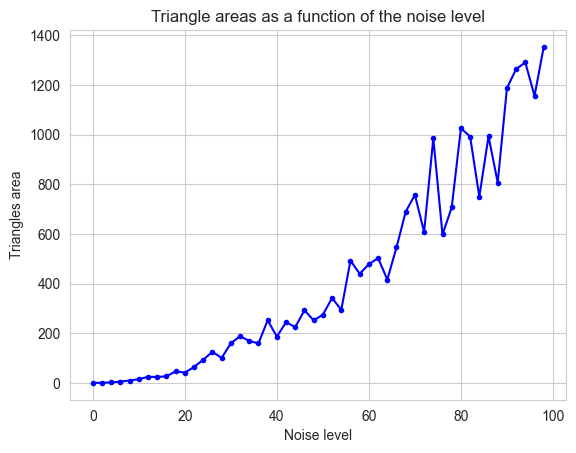

In [3]:
plt.title('Triangle areas as a function of the noise level')
plt.xlabel('Noise level')
plt.ylabel('Triangles area')
plt.plot(noise_vec, mean_area_vec, '.-', color='blue')


mas simulaciones para hacer un promedio 

In [58]:
### try for different noise levels 
noise_vec = np.arange(0, 100, 2.5) #different values of noise 
#noise_vec = [0, 0.25, 0.5, 0.75]
mean_area_vec = []
std_vec = []
error_area = []
for noise in noise_vec: 
    a = []; s = []
    for i in range(80):
        hex_centres = init.hexagonal_centres_nbp(7, 8, noise, rand= np.random.RandomState())
        #mean_area_vec.append(mean_area_triangles(hex_centres[0]))
        hex_centres = hex_centres[0]
        tri = Delaunay(hex_centres)
        triangles = hex_centres[tri.simplices]
        
        # angles_t = crt.angles_t(triangles)
        # angles = []
        # for elem in angles_t: 
        #     angles.append(elem[0]) ;   angles.append(elem[1]);    angles.append(elem[2])


        # angles_mean = np.mean(angles); angles_std = np.std(angles)

        # threshold = angles_mean+2*angles_std
        # non_obtuse, non_obtuse_indices, obtuse, obtuse_indices = crt.triangle_sieve_zscore(triangles, threshold)
        non_obtuse, non_obtuse_indices, obtuse, obtuse_indices = crt.triangle_sieve(triangles, np.pi / 13, np.pi - (np.pi / 13))

        area, std = crt.mean_area_triangles(non_obtuse)
        a.append(area); s.append(std);
    mean_area_vec.append(np.mean(a))
    error_area.append(sem(a))
    std_vec.append(np.mean(s))
a = 1 

Text(-7.277777777777784, 0.5, 'Area$  \\; (\\mu m^2) $')

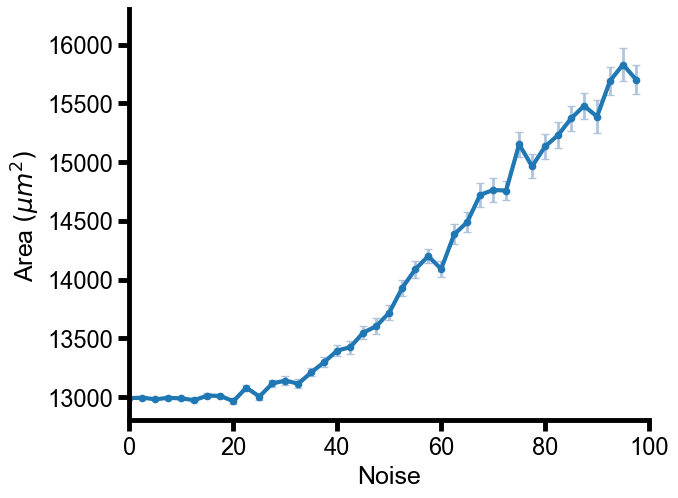

In [59]:
plt.errorbar(noise_vec, mean_area_vec, yerr = error_area, color = 'tab:blue', ecolor =   'lightsteelblue', capsize = 3,
              marker='o', markersize=4.5, linewidth = 2)
plt.plot(noise_vec, mean_area_vec, linewidth = 3)
sns.set_style('white', {'axes.linewidth': 3})
plt.rcParams['xtick.major.size'] = 8
plt.rcParams['xtick.major.width'] = 3.5
plt.rcParams['ytick.major.size'] = 8
plt.rcParams['ytick.major.width'] = 3.5
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True
plt.tick_params(axis='x', colors='black')

# Change the color of the y-axis ticks to blue
plt.tick_params(axis='y', colors='black')
# plt.tick_params(axis='both', which='major', labelsize=14)
plt.rcParams['ytick.labelsize']= 17
plt.rcParams['xtick.labelsize']= 17
plt.rcParams['legend.fontsize'] = 15
plt.tight_layout()
plt.xlim(0, 105)
ax = plt.gca()
plt.xlim(0, 100); plt.ylim(12800, 16300)
ax.spines['left'].set_linewidth(3.5)   # Left Y-axis
ax.spines['bottom'].set_linewidth(3.5) # Bottom X-axis
ax.spines['top'].set_linewidth(0) # Bottom X-axis
ax.spines['right'].set_linewidth(0) # Bottom X-axis
ax.spines['left'].set_color('black')   # Left Y-axis
ax.spines['bottom'].set_color('black') 
plt.xlabel('Noise', size = 18, color='black')
plt.ylabel('Area'+r'$  \; (\mu m^2) $', size = 18, color='black')


## 2. EDGE CHARACTERIZATION: compute length of the edges of the triangles of the Delaunay triangulation

# mas simulaciones para hacer el promedio

In [53]:
### try for different noise levels 
n_sim = 80
noise_vec = np.arange(0, 100, 2) #different values of noise 
n = noise_vec.size
mean_per_vec = []
total_length =[]; error_per =[]
for noise in noise_vec: 
    p = []; l =[]
    for i in range(n_sim):
        hex_centres = init.hexagonal_centres_nbp(7, 8, noise, rand= np.random.RandomState())
        hex_centres = hex_centres[0]
        tri = Delaunay(hex_centres)
        triangles = hex_centres[tri.simplices]
        angles_t = crt.angles_t(triangles)
        angles = []
        for elem in angles_t: 
            angles.append(elem[0]) ;   angles.append(elem[1]);    angles.append(elem[2])


        angles_mean = np.mean(angles); angles_std = np.std(angles)

        threshold = angles_mean+2*angles_std
        non_obtuse, non_obtuse_indices, obtuse, obtuse_indices = crt.triangle_sieve_zscore(triangles, threshold)
     
        #non_obtuse, non_obtuse_indices, obtuse, obtuse_indices = crt.triangle_sieve(triangles, np.pi / 13, np.pi - (np.pi / 13))
        p.append(crt.mean_perimeter(non_obtuse))
        l.append(crt.total_length(non_obtuse))
    mean_per_vec.append(np.mean(p))
    error_per.append(sem(p))
    total_length.append(np.mean(l))

Text(19.097222222222214, 0.5, 'Perimeter$  \\; (\\mu m) $')

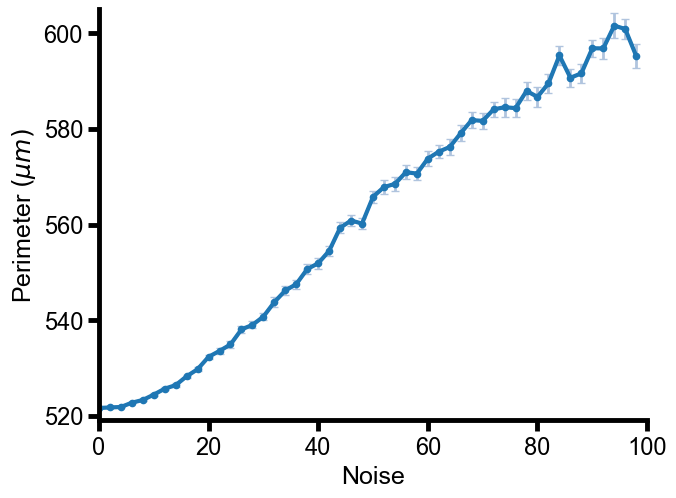

In [56]:
plt.errorbar(noise_vec, mean_per_vec, yerr = error_per, color = 'tab:blue', ecolor =   'lightsteelblue', capsize = 3,
              marker='o', markersize=4.5, linewidth = 2)
plt.plot(noise_vec, mean_per_vec, linewidth = 3)
sns.set_style('white', {'axes.linewidth': 3})
plt.rcParams['xtick.major.size'] = 8
plt.rcParams['xtick.major.width'] = 3.5
plt.rcParams['ytick.major.size'] = 8
plt.rcParams['ytick.major.width'] = 3.5
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True
plt.tick_params(axis='x', colors='black')

# Change the color of the y-axis ticks to blue
plt.tick_params(axis='y', colors='black')
# plt.tick_params(axis='both', which='major', labelsize=14)
plt.rcParams['ytick.labelsize']= 17
plt.rcParams['xtick.labelsize']= 17
plt.rcParams['legend.fontsize'] = 15
plt.tight_layout()
plt.xlim(0, 105)
ax = plt.gca()
plt.xlim(0, 100); plt.ylim(519, 605)
ax.spines['left'].set_linewidth(3.5)   # Left Y-axis
ax.spines['bottom'].set_linewidth(3.5) # Bottom X-axis
ax.spines['top'].set_linewidth(0) # Bottom X-axis
ax.spines['right'].set_linewidth(0) # Bottom X-axis
ax.spines['left'].set_color('black')   # Left Y-axis
ax.spines['bottom'].set_color('black') 
plt.xlabel('Noise', size = 18, color='black')
plt.ylabel('Perimeter'+r'$  \; (\mu m) $', size = 18, color='black')


## Calculation of parameters needed for the characterization of angle and edge distortion


### Length of edges $d_{ij}$  
     For each triangle an array of 3 edges will be created. Each item will be the length of each edge.
     So the result will be an array where each element is an array with the length of the three edges of each triangle


In [ ]:
edges_length = []
eij = []
for t in triangles: #recall that t is an array of 3 elements, each of them with the x and y coordinate of each vertex 
    d01 = np.linalg.norm(t[0]-t[1])
    d02 = np.linalg.norm(t[0]-t[2])
    d12 = np.linalg.norm(t[1]-t[2])
    eij.append([t[0]-t[1],t[0]-t[2],t[1]-t[2]] )
    edges_length.append([d01, d02, d12])
print(edges_length)
print(eij)

### Angle between edges $\theta_{ij}$

In [ ]:
angles= []
def angle_between(v1, v2): 
    num = np.dot(v1, v2)
    den = np.linalg.norm(v1)*np.linalg.norm(v2)
    angle = np.arccos(num/den)
    return angle
for t in eij:
        theta01 = angle_between(t[0], t[1])
        theta02 = angle_between(t[0], t[2])
        theta21 = angle_between(t[2], t[1])
        angles.append([theta01, theta02, theta21])
print(angles)
####### function of characterization: 
angles1 = crt.angles_t(hex_centres)
print(angles1)

### Mean length of each triangle edges $\mu_k$

In [ ]:
mean_length_single_t = np.mean(edges_length, 1)
print(mean_length_single_t)

## LENGTH DISTORTION

No entiendo bien la formula del paper porq creo q no tiene sentido el indice k de la d ?? no dberia ser cada longtud menos la media??? 

#con promedio de simulaciones

In [31]:
### try for different noise levels 
noise_vec = np.arange(0, 100, 2) #different values of noise 
n = noise_vec.size
l_distortion = []; error = []
n_sim = 50
for noise in noise_vec: 
    ld = []
    for i in range(n_sim):
        hex_centres = init.hexagonal_centres_nbp(7, 8, noise, rand= np.random.RandomState())
        #mean_area_vec.append(mean_area_triangles(hex_centres[0]))
        hex_centres = hex_centres[0]
        tri = Delaunay(hex_centres)

        triangles = hex_centres[tri.simplices]
        angles_t = crt.angles_t(triangles)
        angles = []
        for elem in angles_t: 
            angles.append(elem[0]) ;   angles.append(elem[1]);    angles.append(elem[2])


        angles_mean = np.mean(angles); angles_std = np.std(angles)

        threshold = angles_mean+2*angles_std
        non_obtuse, non_obtuse_indices, obtuse, obtuse_indices = crt.triangle_sieve_zscore(triangles, threshold)
        
        #non_obtuse, non_obtuse_indices, obtuse, obtuse_indices = crt.triangle_sieve(triangles, np.pi / 12, np.pi - (np.pi / 12))
        ld.append(np.mean(crt.length_distortion(non_obtuse)))
    l_distortion.append(np.mean(ld))
    error.append(sem(ld))
    

Text(12.597222222222216, 0.5, 'Length distortion')

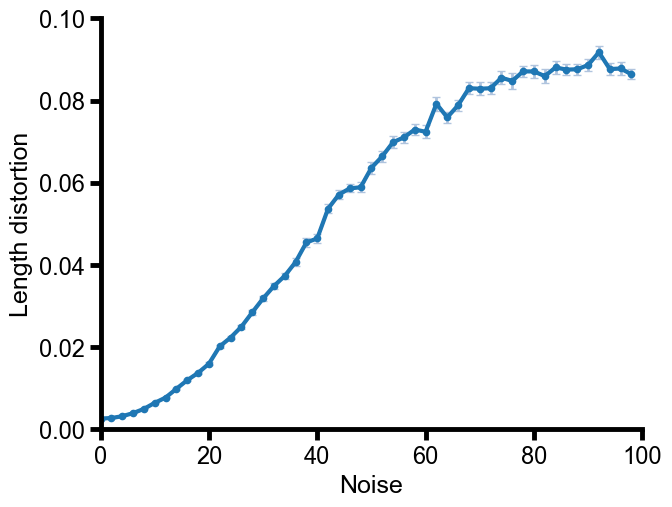

In [55]:
plt.errorbar(noise_vec, l_distortion, yerr = error, color = 'tab:blue', ecolor =   'lightsteelblue', capsize = 3,
              marker='o', markersize=4.5, linewidth = 2)
plt.plot(noise_vec, l_distortion, linewidth = 3)
sns.set_style('white', {'axes.linewidth': 3})
plt.rcParams['xtick.major.size'] = 8
plt.rcParams['xtick.major.width'] = 3.5
plt.rcParams['ytick.major.size'] = 8
plt.rcParams['ytick.major.width'] = 3.5
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True
plt.tick_params(axis='x', colors='black')

# Change the color of the y-axis ticks to blue
plt.tick_params(axis='y', colors='black')
# plt.tick_params(axis='both', which='major', labelsize=14)
plt.rcParams['ytick.labelsize']= 17
plt.rcParams['xtick.labelsize']= 17
plt.rcParams['legend.fontsize'] = 15
plt.tight_layout()
plt.xlim(0, 105)
ax = plt.gca()
plt.xlim(0, 100); plt.ylim(0, 0.1)
ax.spines['left'].set_linewidth(3.5)   # Left Y-axis
ax.spines['bottom'].set_linewidth(3.5) # Bottom X-axis
ax.spines['top'].set_linewidth(0) # Bottom X-axis
ax.spines['right'].set_linewidth(0) # Bottom X-axis
ax.spines['left'].set_color('black')   # Left Y-axis
ax.spines['bottom'].set_color('black') 
plt.xlabel('Noise', size = 18, color='black')
plt.ylabel('Length distortion', size = 18, color='black')


## ANGLE DISTORTION

# promedio de simulaciones 

In [8]:
### try for different noise levels 
noise_vec = np.arange(0,100, 2) #different values of noise 
n = noise_vec.size
angle_distortion = []
l1 = []; error_ad = []
n_sim = 80
for noise in noise_vec: 
    a = []
    for i in range(n_sim):
        hex_centres = init.hexagonal_centres_nbp(11, 12, noise, rand= np.random.RandomState())
        #mean_area_vec.append(mean_area_triangles(hex_centres[0]))
        hex_centres = hex_centres[0]
        tri = Delaunay(hex_centres)
        triangles = hex_centres[tri.simplices]
        angles_t = crt.angles_t(triangles)
        angles = []
        for elem in angles_t: 
            angles.append(elem[0]) ;   angles.append(elem[1]);    angles.append(elem[2])


        angles_mean = np.mean(angles); angles_std = np.std(angles)

        threshold = angles_mean+2*angles_std
        non_obtuse, non_obtuse_indices, obtuse, obtuse_indices = crt.triangle_sieve_zscore(triangles, threshold)
        #non_obtuse, non_obtuse_indices, obtuse, obtuse_indices = crt.triangle_sieve(triangles, np.pi / 5, np.pi - (np.pi / 5))

        ad = crt.angle_distortion(non_obtuse)
    angle_distortion.append(np.mean(ad))
    error_ad.append(sem(ad))
print(angle_distortion)


[0.006554929675607365, 0.00697903929043719, 0.00790566744972011, 0.010155745308976033, 0.012123708674101109, 0.0162259044147605, 0.019795352179857027, 0.02712802653339898, 0.02958376900259173, 0.031962306894813095, 0.05717062134443226, 0.04646302059253082, 0.05630374383470281, 0.0678664477661707, 0.08050138067687558, 0.08445740397238548, 0.09135471330037821, 0.10442430475178555, 0.11000214450254148, 0.13302540759501386, 0.1348664402047762, 0.1278181690289681, 0.1352507230042343, 0.12486362408999037, 0.16342395380302238, 0.15987034916908133, 0.1540928201297827, 0.15345882228336674, 0.16982498639996288, 0.1546542475308908, 0.19888328133824354, 0.20052364537084064, 0.18161473169954334, 0.1809739204335411, 0.19074927354635174, 0.19921078586503213, 0.19560091842277022, 0.19260949493090043, 0.21200024611376558, 0.21626385899415998, 0.20197883109598982, 0.19279758460517454, 0.20724500187263756, 0.20562257029589828, 0.21613651160333563, 0.18120295609672346, 0.20812527816313683, 0.2081639107296

Text(12.472222222222216, 0.5, 'Angle distortion')

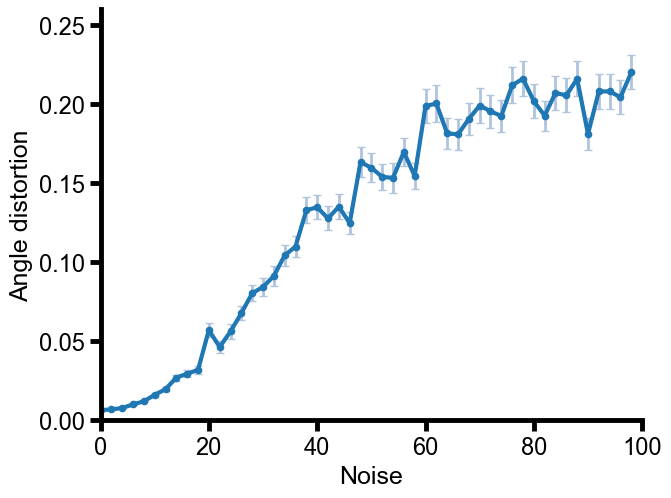

In [30]:
plt.errorbar(noise_vec, angle_distortion, yerr = error_ad, color = 'tab:blue', ecolor =   'lightsteelblue', capsize = 3,
              marker='o', markersize=4.5, linewidth = 2)
plt.plot(noise_vec, angle_distortion, linewidth = 3)
sns.set_style('white', {'axes.linewidth': 3})
plt.rcParams['xtick.major.size'] = 8
plt.rcParams['xtick.major.width'] = 3.5
plt.rcParams['ytick.major.size'] = 8
plt.rcParams['ytick.major.width'] = 3.5
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True
plt.tick_params(axis='x', colors='black')

# Change the color of the y-axis ticks to blue
plt.tick_params(axis='y', colors='black')
# plt.tick_params(axis='both', which='major', labelsize=14)
plt.rcParams['ytick.labelsize']= 17
plt.rcParams['xtick.labelsize']= 17
plt.rcParams['legend.fontsize'] = 15
plt.tight_layout()
plt.xlim(0, 105)
ax = plt.gca()
plt.xlim(0, 100); plt.ylim(0, 0.26)
ax.spines['left'].set_linewidth(3.5)   # Left Y-axis
ax.spines['bottom'].set_linewidth(3.5) # Bottom X-axis
ax.spines['top'].set_linewidth(0) # Bottom X-axis
ax.spines['right'].set_linewidth(0) # Bottom X-axis
ax.spines['left'].set_color('black')   # Left Y-axis
ax.spines['bottom'].set_color('black') 
plt.xlabel('Noise', size = 18, color='black')
plt.ylabel('Angle distortion', size = 18, color='black')


In [4]:
### try for different noise levels 
noise_vec = np.arange(0,0.75, 0.025) #different values of noise 
n = noise_vec.size
angle_distortion = []
l1 = []; error_ad = []
n_sim = 30; shape_index = []
for noise in noise_vec: 
    a = []
    si = []
    for i in range(n_sim):
        hex_centres = init.hexagonal_centres(18, 18, noise, rand= np.random.RandomState())
        #mean_area_vec.append(mean_area_triangles(hex_centres[0]))
        mesh = init.toroidal_ic_mesh(hex_centres)
        
        # hex_centres = hex_centres[0]
        # tri = Delaunay(hex_centres)
        # triangles = hex_centres[tri.simplices]
        # angles_t = crt.angles_t(triangles)
        # angles = []
        # for elem in angles_t: 
        #     angles.append(elem[0]) ;   angles.append(elem[1]);    angles.append(elem[2])


        # angles_mean = np.mean(angles); angles_std = np.std(angles)

        # threshold = angles_mean+2*angles_std
        # non_obtuse, non_obtuse_indices, obtuse, obtuse_indices = crt.triangle_sieve_zscore(triangles, threshold)
        #non_obtuse, non_obtuse_indices, obtuse, obtuse_indices = crt.triangle_sieve(triangles, np.pi / 5, np.pi - (np.pi / 5))
        si.append( crt.shape_index(mesh))
        # ad = crt.angle_distortion(non_obtuse)
    # angle_distortion.append(np.mean(ad))
    error_ad.append(sem(si))
    shape_index.append(np.mean(si))



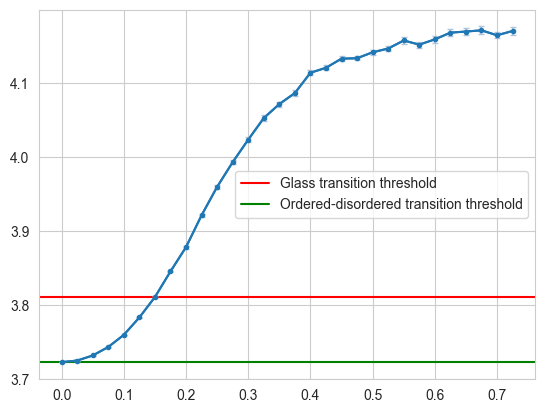

In [5]:
plt.plot(noise_vec, shape_index)
plt.axhline(y = 3.81, color = 'red', label ='Glass transition threshold')
plt.axhline(y = 3.722, color = 'green', label ='Ordered-disordered transition threshold')
plt.errorbar(noise_vec, shape_index, yerr = error_ad, color = 'tab:blue', ecolor =   'lightsteelblue', capsize = 2,
              marker='o', markersize=3)
plt.legend()

In [6]:
shape_index[0]

3.7224194364083996